In [3]:
import sys
sys.path.append('../_amigocloud')

In [14]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
path_siembras = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_puntos = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS.shp'

In [8]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)

In [24]:
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [10]:
semana = 23

In [12]:
gdf_puntos_sem = gdf_puntos[gdf_puntos['semana'] == semana]
gdf_puntos_sem

,Name,semana,geometry
0,None,23,POINT (472103.475 8093494.430)
1,None,23,POINT (472478.126 8093519.830)
2,None,23,POINT (473232.190 8093469.030)
3,None,23,POINT (479293.553 8078858.312)
4,None,23,POINT (480677.856 8079213.913)
5,None,23,POINT (481490.658 8077886.760)
6,None,23,POINT (479128.453 8076134.157)
7,None,23,POINT (463704.272 8085352.900)


<Axes: >

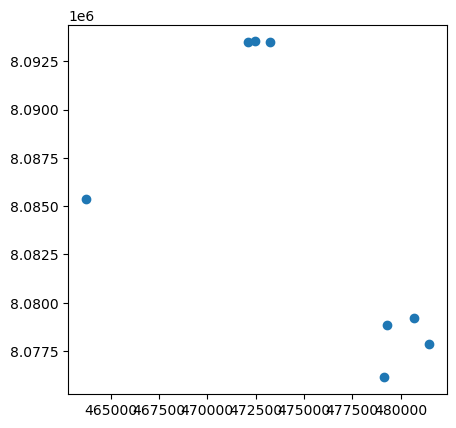

In [13]:
gdf_puntos_sem.plot()

In [28]:
# identifoca los lotes que se intersectan
gdf_lotes_selec = gpd.sjoin(gdf_siembras, gdf_puntos, how='inner', predicate='intersects')

In [40]:
# filtra los lotes intersectados en la capa original
poligonos_intersect = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_selec.index)]
poligonos_intersect = poligonos_intersect.copy()

In [41]:
poligonos_intersect['semana'] = semana

In [42]:
poligonos_intersect

,sem_reg,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,geometry,semana
13,19,63,SAN MARIANITO--CRONEMBOLD AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L51,9.68,2024-03-22,SIEMBRA 2024,75,"POLYGON ((481468.762 8078156.958, 481662.937 8...",23
14,19,63,SAN MARIANITO--CRONEMBOLD AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L30.1,8.38,2024-03-13,SIEMBRA 2024,84,"POLYGON ((480615.505 8078842.811, 480575.420 8...",23
15,19,63,SAN MARIANITO--CRONEMBOLD AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L1,12.76,2024-03-17,SIEMBRA 2024,80,"POLYGON ((479417.107 8079042.290, 479409.645 8...",23
17,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L6,9.41,2024-04-10,SIEMBRA 2024,56,"POLYGON ((472307.589 8093709.193, 472531.882 8...",23
18,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L7,4.96,2024-04-10,SIEMBRA 2024,56,"POLYGON ((472036.356 8093717.214, 472143.866 8...",23
21,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L4,1.30,2024-04-10,SIEMBRA 2024,56,"POLYGON ((473259.136 8093369.842, 473298.235 8...",23
22,19,558,NARANJAL--MARTA S. AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L7,6.32,2024-04-10,SIEMBRA 2024,56,"POLYGON ((479162.628 8076488.740, 479247.562 8...",23
26,20,183,EL IMPERIO--TUFIÑO,13763,TUFINO SCHWENK RUBEN DARIO,L2.2,8.55,2024-04-08,SIEMBRA 2024,58,"POLYGON ((463673.452 8085169.511, 463667.024 8...",23


In [43]:
path_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'
gdf_plan = gpd.read_file(path_plan)
gdf_pla_gral = pd.concat([gdf_plan, poligonos_intersect], ignore_index=True)
gdf_pla_gral.to_file(path_plan)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26584\183825536.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_pla_gral = pd.concat([gdf_plan, poligonos_intersect], ignore_index=True)
